<img src="https://www.pinclipart.com/picdir/big/110-1107780_news-clip-art-png-download.png" alt="news-image" width=300>

# News Articles Classification

### • Context
#### Text summarization is a way to condense the large amount of information into a concise form by the process of selection of important information and discarding unimportant and redundant information. With the amount of textual information present in the world wide web the area of text summarization is becoming very important. The extractive summarization is the one where the exact sentences present in the document are used as summaries. The extractive summarization is simpler and is the general practice among the automatic text summarization researchers at the present time. Extractive summarization process involves giving scores to sentences using some method and then using the sentences that achieve highest scores as summaries. As the exact sentence present in the document is used the semantic factor can be ignored which results in generation of less calculation intensive summarization procedure. This kind of summary is generally completely unsupervised and language independent too. Although this kind of summary does its job in conveying the essential information it may not be necessarily smooth or fluent. Sometimes there can be almost no connection between adjacent sentences in the summary resulting in the text lacking in readability.
### • Content
#### This dataset for extractive text summarization has four hundred and seventeen political news articles of BBC from 2004 to 2005 in the News Articles folder. For each articles, five summaries are provided in the Summaries folder. The first clause of the text of articles is the respective title.
### Acknowledgements
#### • This dataset was created using a dataset used for data categorization that onsists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005 used in the paper of D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006; whose all rights, including copyright, in the content of the original articles are owned by the BBC. More at http://mlg.ucd.ie/datasets/bbc.html

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

## File Directories

In [3]:
current_directory = os.getcwd()
article_path = os.path.join(current_directory, 'BBC News Summary\\News Articles')
folders = os.listdir(article_path)
print(f"Current Directory: {current_directory}")
print(f"Article Path: {article_path}")
print(f"Folders: {folders}")

Current Directory: D:\jupyter\GitHub\News Articles Classification
Article Path: D:\jupyter\GitHub\News Articles Classification\BBC News Summary\News Articles
Folders: ['business', 'entertainment', 'politics', 'sport', 'tech']


## Creating DataFrame Columns from Text Files

In [6]:
file_ids = []
texts = []
categories = []
for category in folders:
    category_directory = os.path.join(article_path, category)
    for file in os.listdir(category_directory):
        file_directory = os.path.join(category_directory, file)
        with open(file_directory, 'r') as f:
            file_ids.append(category[:3] + '_' + file)
            texts.append(f.read())
            categories.append(category) 

## Final DataFrame

In [7]:
df = pd.DataFrame({'file_id': file_ids,'category': categories, 'text': texts})
df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)
print(f"Shape: {df.shape}")
df.head()

Shape: (2225, 3)


file_id       category  \
0  pol_313.txt       politics   
1  pol_158.txt       politics   
2  spo_305.txt          sport   
3  tec_094.txt           tech   
4  ent_106.txt  entertainment   

                                                text  
0  Parties warned over 'grey vote'\n\nPolitical p...  
1  Petrol duties frozen, Brown says\n\nChancellor...  
2  Kirwan demands Italy consistency\n\nItaly coac...  
3  What high-definition will do to DVDs\n\nFirst ...  
4  Streets have 'album of the year'\n\nThe Street...

# Exploratory Data Analysis

In [14]:
values

category
business         510
entertainment    386
politics         417
sport            511
tech             401
dtype: int64

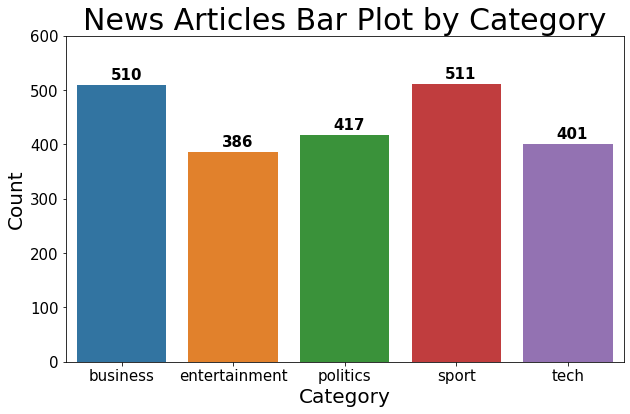

In [20]:
values = df.groupby('category').size()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(values.index, values.values, ax=ax, order=values.index)
#sns.countplot(x='category', data=df, ax=ax, order=values.index)
ax.set_title('News Articles Bar Plot by Category', fontsize=30)
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(labelsize=15)
for i in range(len(values)):
    ax.text(i-0.1, values[i]+10, values[i], fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_ylim(0, 600)
plt.show()

### • Articles are more or less evenly distributed among each category, with "business" and "sport" being at the top.

## Calculating the Text Length for Each Row

In [21]:
df['text_length'] = df.text.apply(lambda x: len(x))
df.head()

file_id       category  \
0  pol_313.txt       politics   
1  pol_158.txt       politics   
2  spo_305.txt          sport   
3  tec_094.txt           tech   
4  ent_106.txt  entertainment   

                                                text  text_length  
0  Parties warned over 'grey vote'\n\nPolitical p...         2374  
1  Petrol duties frozen, Brown says\n\nChancellor...         1575  
2  Kirwan demands Italy consistency\n\nItaly coac...          939  
3  What high-definition will do to DVDs\n\nFirst ...         5103  
4  Streets have 'album of the year'\n\nThe Street...         1164

## Distributions of Text Length by Category

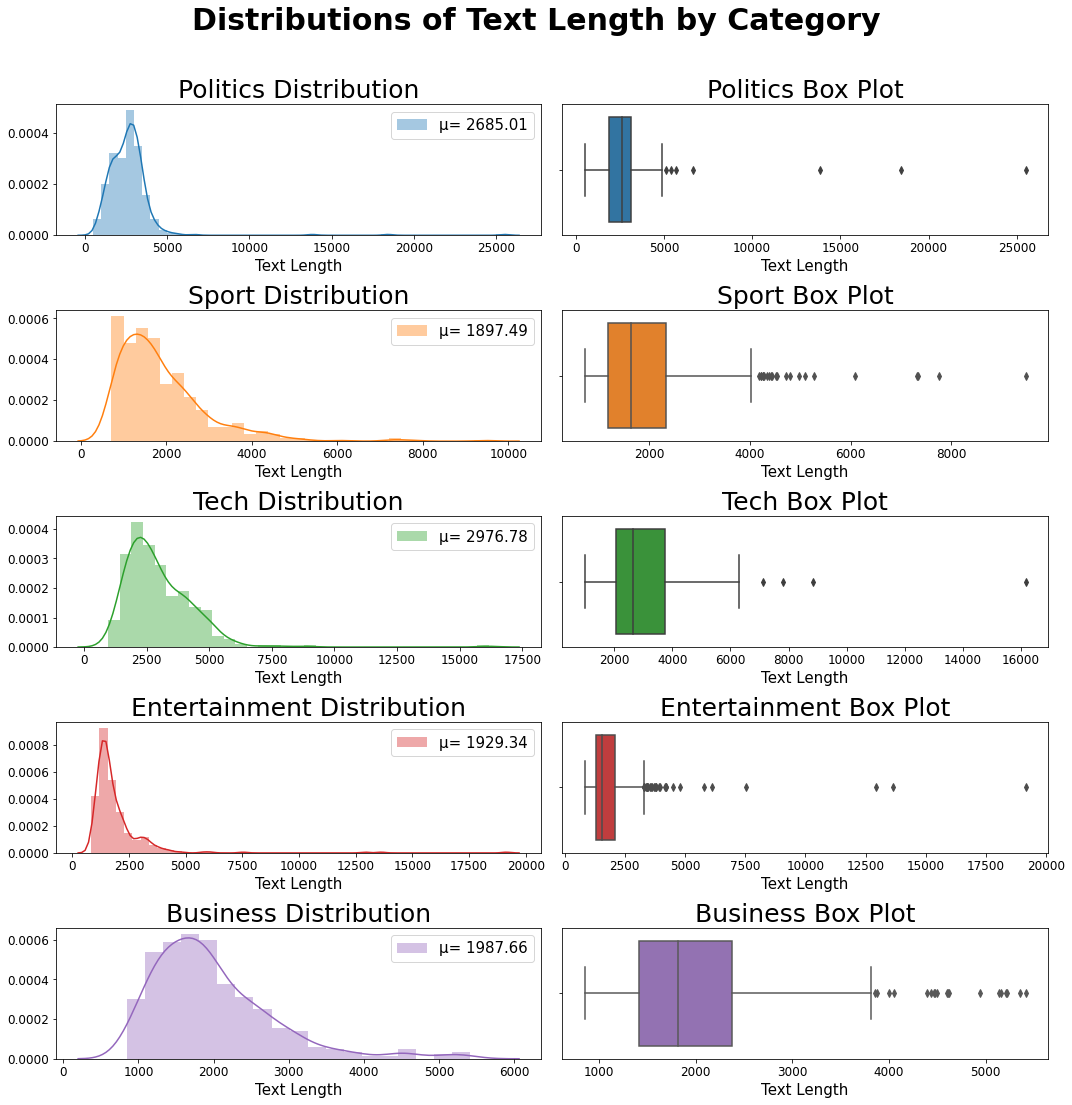

In [27]:
category_means = df.groupby('category')['text_length'].mean()
category_medians = df.groupby('category')['text_length'].median()
category_values = list(df.category.unique())
colors = sns.color_palette()[:5]
index = 0
fig, ax = plt.subplots(5, 2, figsize=(15,15))
for x in range(5):
    sns.distplot(df[df.category == category_values[index]]['text_length'], ax=ax[x,0], color=colors[index], label=f"μ= {np.round(category_means[category_values[index]], 2)}")
    sns.boxplot(df[df.category == category_values[index]]['text_length'], ax=ax[x,1], color=colors[index])
    ax[x,0].set_title(f"{category_values[index].capitalize()} Distribution", fontsize=25)
    ax[x,1].set_title(f"{category_values[index].capitalize()} Box Plot", fontsize=25)
    ax[x,0].tick_params(labelsize=12)
    ax[x,1].tick_params(labelsize=12)
    ax[x,0].legend(fontsize=15)
    for i in range(2):
        ax[x,i].set_xlabel('Text Length', fontsize=15)
    index += 1

fig.suptitle('Distributions of Text Length by Category', fontsize=30, fontweight='semibold', y=1.02)
fig.tight_layout()

### • All category distributions are right-skewed.
### • All category box plots have outliers to the right of the distribution.
### • "Tech" category has the highest average amount of characters, followed by "Politics".

## Pre-Processing the "text" Column

In [28]:
tokenizer = nltk.RegexpTokenizer('[^a-zA-Z0-9-\']', gaps=True)
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
df['tokens'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['clean_text'] = df.tokens.apply(lambda x: ' '.join([word for word in x]))
df['no_stopwords'] = df.tokens.apply(lambda x: ' '.join([word for word in x if word not in stopwords]))
df['stemmed'] = df.tokens.apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stopwords]))
df['pos_tags'] = df.tokens.apply(lambda x: nltk.pos_tag(x))

In [29]:
df.head()

file_id       category  \
0  pol_313.txt       politics   
1  pol_158.txt       politics   
2  spo_305.txt          sport   
3  tec_094.txt           tech   
4  ent_106.txt  entertainment   

                                                text  text_length  \
0  Parties warned over 'grey vote'\n\nPolitical p...         2374   
1  Petrol duties frozen, Brown says\n\nChancellor...         1575   
2  Kirwan demands Italy consistency\n\nItaly coac...          939   
3  What high-definition will do to DVDs\n\nFirst ...         5103   
4  Streets have 'album of the year'\n\nThe Street...         1164   

                                              tokens  \
0  [parties, warned, over, 'grey, vote', politica...   
1  [petrol, duties, frozen, brown, says, chancell...   
2  [kirwan, demands, italy, consistency, italy, c...   
3  [what, high-definition, will, do, to, dvds, fi...   
4  [streets, have, 'album, of, the, year', the, s...   

                                          clean_text  \
0  parties warned over 'grey vote' political part...   
1  petrol duties frozen brown says chancellor gor...   
2  kirwan demands italy consistency italy coach j...   
3  what high-definition will do to dvds first it ...   
4  streets have 'album of the year' the streets a...   

                                        no_stopwords  \
0  parties warned 'grey vote' political parties c...   
1  petrol duties frozen brown says chancellor gor...   
2  kirwan demands italy consistency italy coach j...   
3  high-definition dvds first humble home video d...   
4  streets 'album year' streets aka british rappe...   

                                             stemmed  \
0  parti warn 'grey vote' polit parti cannot affo...   
1  petrol duti frozen brown say chancellor gordon...   
2  kirwan demand itali consist itali coach john k...   
3  high-definit dvd first humbl home video dvd ho...   
4  street 'album year' street aka british rapper ...   

                                            pos_tags  
0  [(parties, NNS), (warned, VBD), (over, IN), ('...  
1  [(petrol, NN), (duties, NNS), (frozen, VBP), (...  
2  [(kirwan, NN), (demands, NNS), (italy, JJ), (c...  
3  [(what, WP), (high-definition, NN), (will, MD)...  
4  [(streets, NNS), (have, VBP), ('album, VBN), (...

# Creating WordCloud Visualizations
## Using Part-of-Speech tags, we can find the most frequent noun and verb phrases for each news category.

In [30]:
def chunk_wordcloud(df, pos_column, chunk_grammar, groupby_col=None, image_title='Noun Phrases', font_size=40, font_weight='normal', figure_size=(20,8), title_y_pos=1.05, tight_layout=True,\
 wc_width=1600, wc_height=800, wc_max_words=200, interpolation='bilinear'):
    from wordcloud import WordCloud
    import pandas as pd
    import nltk
    import matplotlib.pyplot as plt
    if groupby_col != None:
        frequencies = dict()
        unique_values = list(df[groupby_col].unique())
        for value in unique_values:
            frequencies[value] = nltk.probability.FreqDist()
    else:
        frequencies = nltk.probability.FreqDist()
        
    parser = nltk.RegexpParser(chunk_grammar)
    for i, pos_tags in enumerate(df[pos_column]):
        parsed_text = parser.parse(pos_tags)
        for text in parsed_text:
            if hasattr(text, 'label'):
                result = ' '.join([word for word, tag in text])
                if type(frequencies) == dict:
                    frequencies[df.iloc[i][groupby_col]][result] += 1
                elif type(frequencies) == nltk.probability.FreqDist:
                    frequencies[result] += 1
    
    if type(frequencies) == dict:
        figures = dict()
        for freq in frequencies.keys():
            wordcloud = WordCloud(width=wc_width, height=wc_height, max_words=wc_max_words).generate_from_frequencies(frequencies[freq])
            fig, ax = plt.subplots(figsize=figure_size)
            fig.set_facecolor('black')
            ax.imshow(wordcloud, interpolation=interpolation)
            ax.set_axis_off()
            ax.set_title(f"{freq.capitalize()} {image_title}", fontsize=font_size, fontweight=font_weight, color='white', y=title_y_pos)
            if tight_layout == True:
                fig.tight_layout()
            plt.close()
            figures[freq] = fig
        return figures
    elif type(frequencies) == nltk.probability.FreqDist:
        wordcloud = WordCloud(width=wc_width, height=wc_height, max_words=wc_max_words).generate_from_frequencies(frequencies)
        fig, ax = plt.subplots(figsize=figure_size)
        fig.set_facecolor('black')
        ax.imshow(wordcloud, interpolation=interpolation)
        ax.set_axis_off()
        ax.set_title(image_title, fontsize=font_size, fontweight=font_weight, color='white', y=title_y_pos)
        if tight_layout == True:
            fig.tight_layout()
        plt.close()
        return fig

In [31]:
np_figures = chunk_wordcloud(df, 'pos_tags', "NP: {<JJ.?><CC>?<JJ.?>?<NN.?.?>}", 'category', figure_size=(20,10), font_weight='bold') 

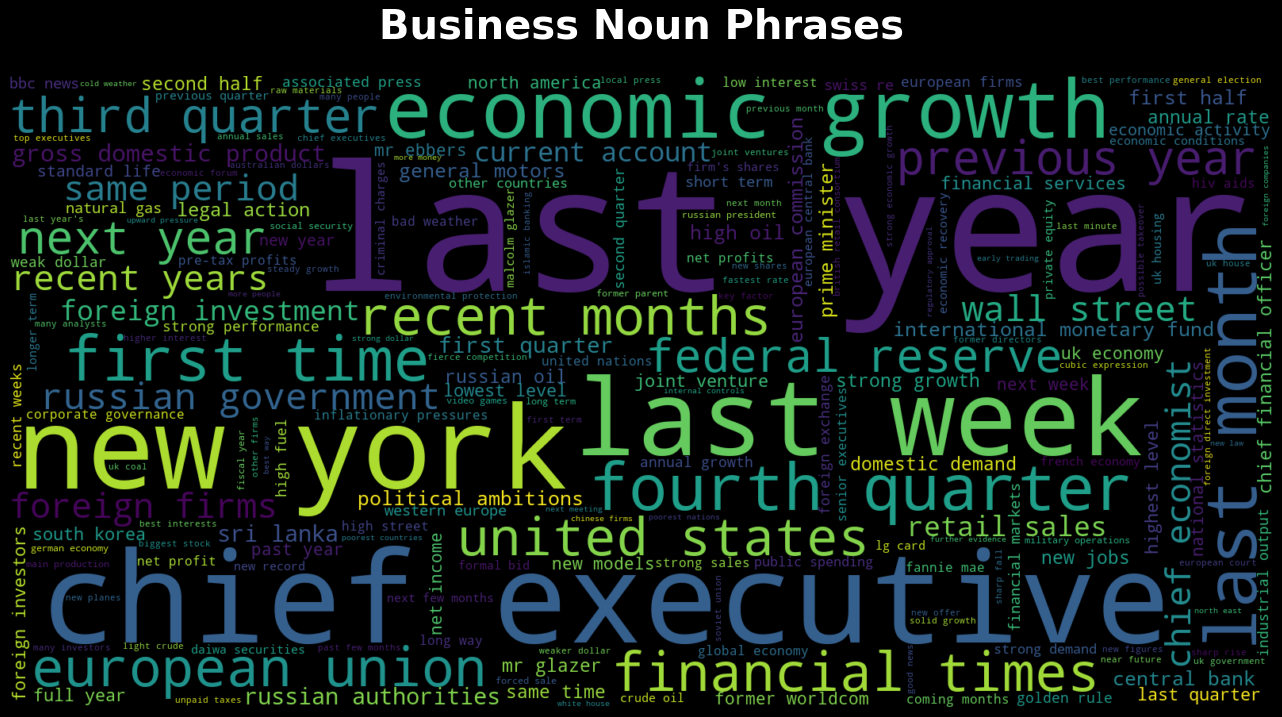

In [40]:
np_figures['business']

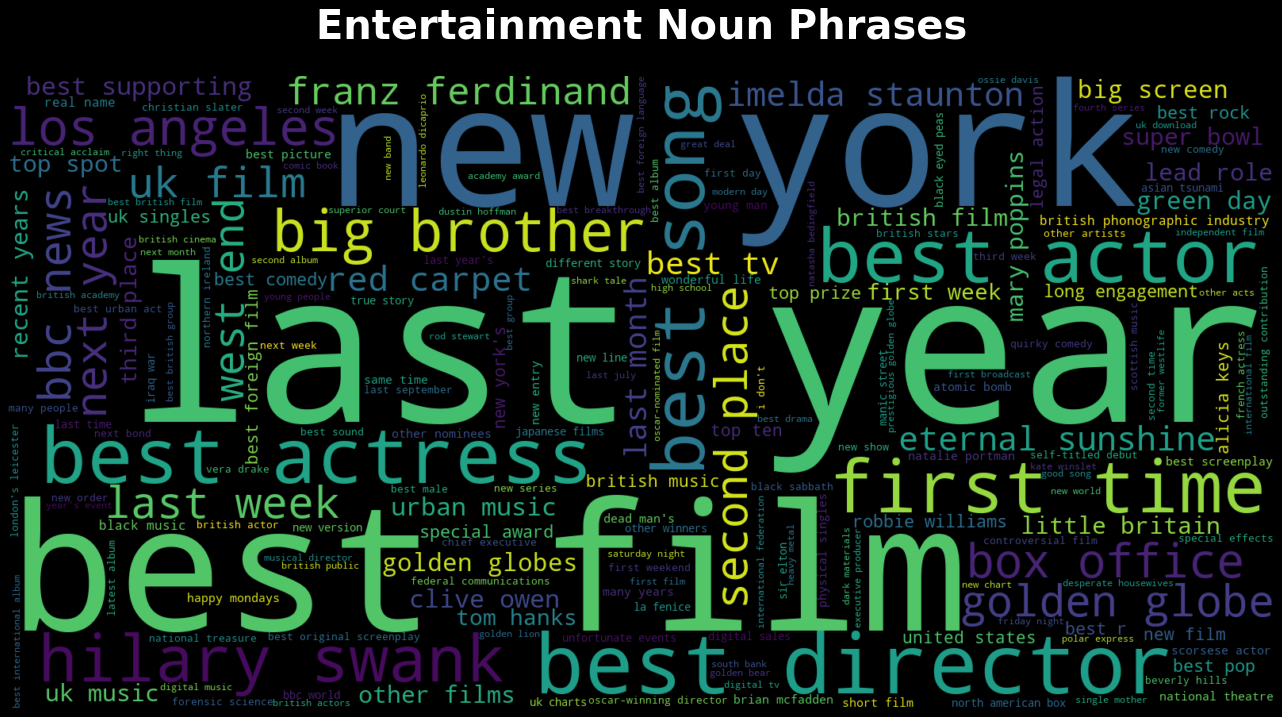

In [34]:
np_figures['entertainment']

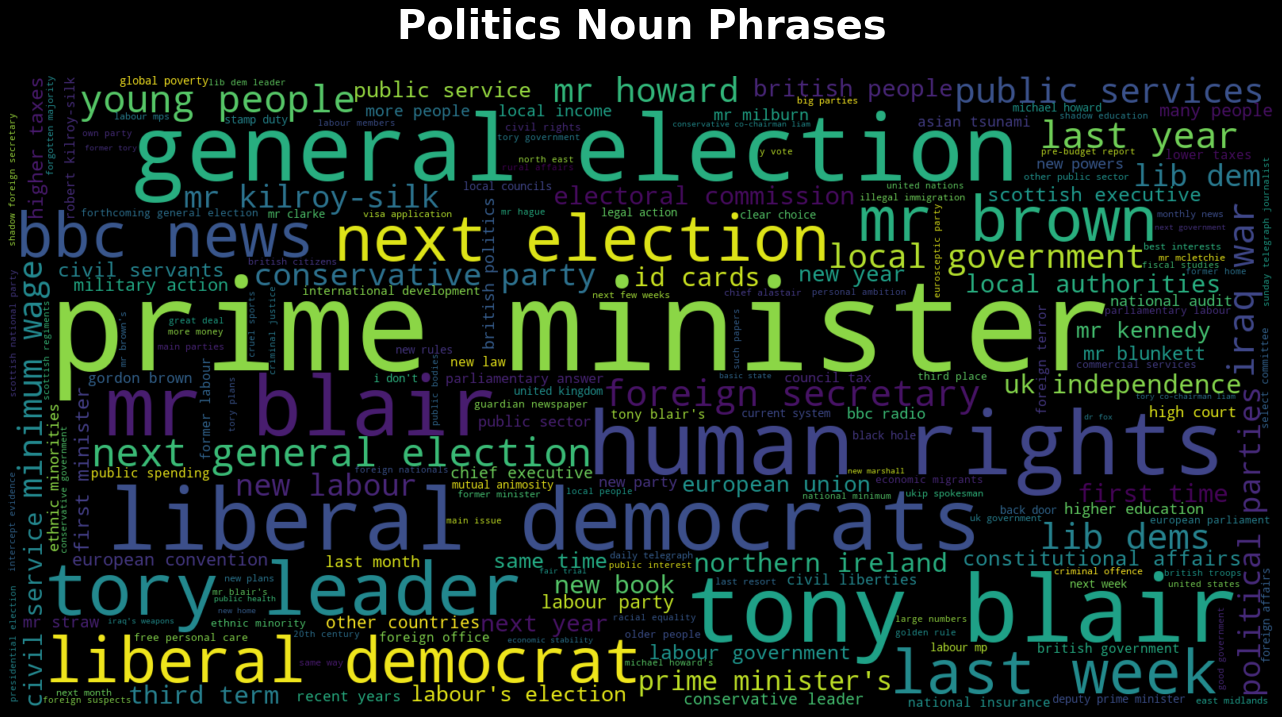

In [35]:
np_figures['politics']

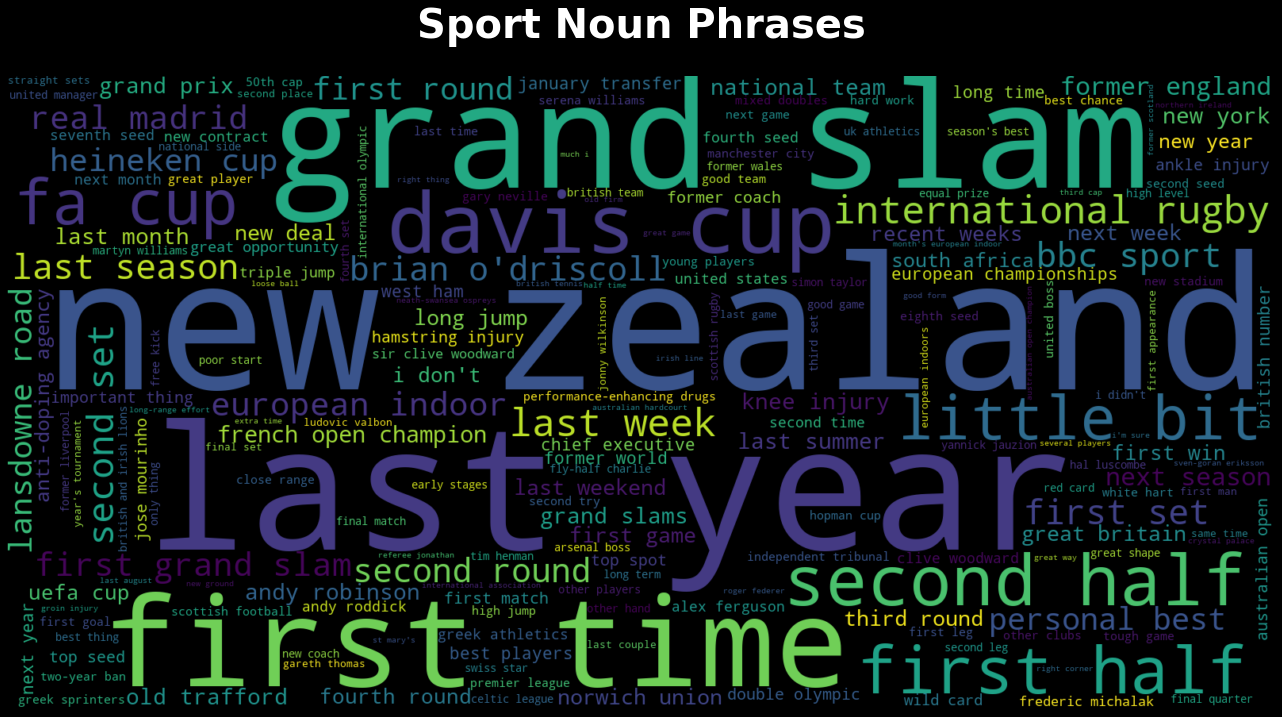

In [36]:
np_figures['sport']

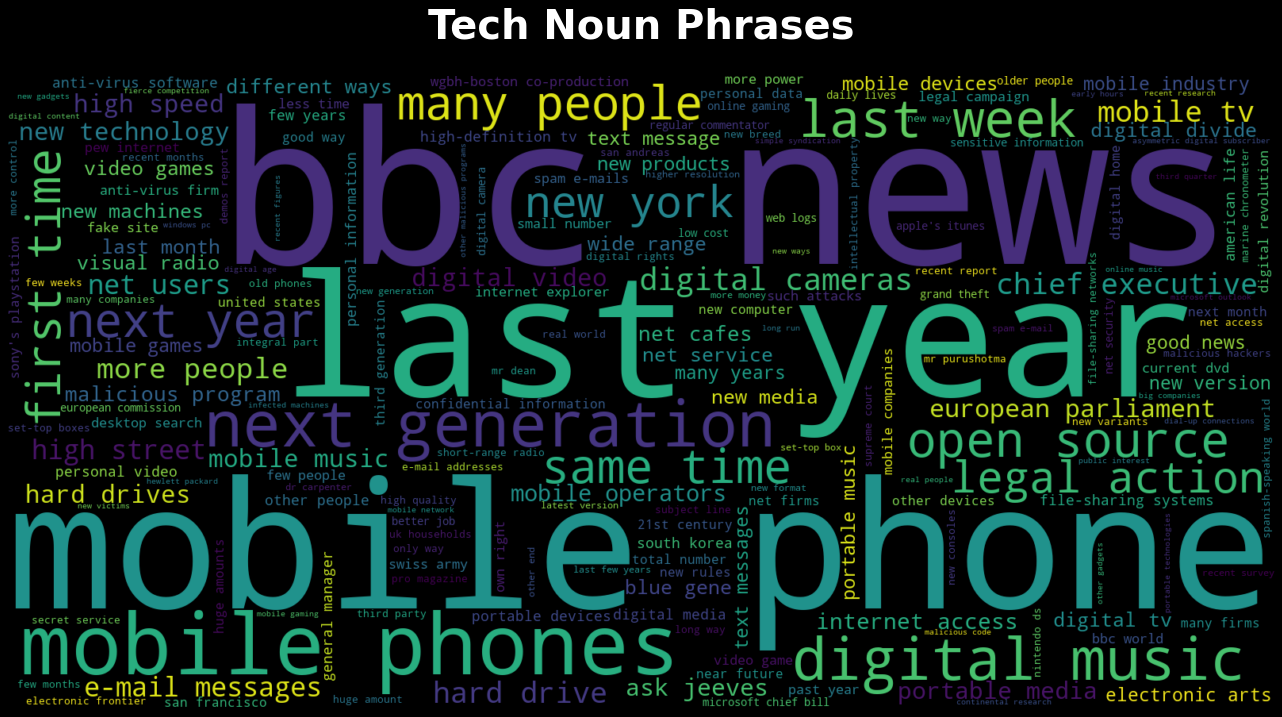

In [37]:
np_figures['tech']

In [38]:
vp_figures = chunk_wordcloud(df, 'pos_tags', 'VP: {<VB.?>(<DT>+|<PRP.?>+)<NN.?.?>}', 'category', figure_size=(20,10), font_weight='bold', image_title='Verb Phrases') 

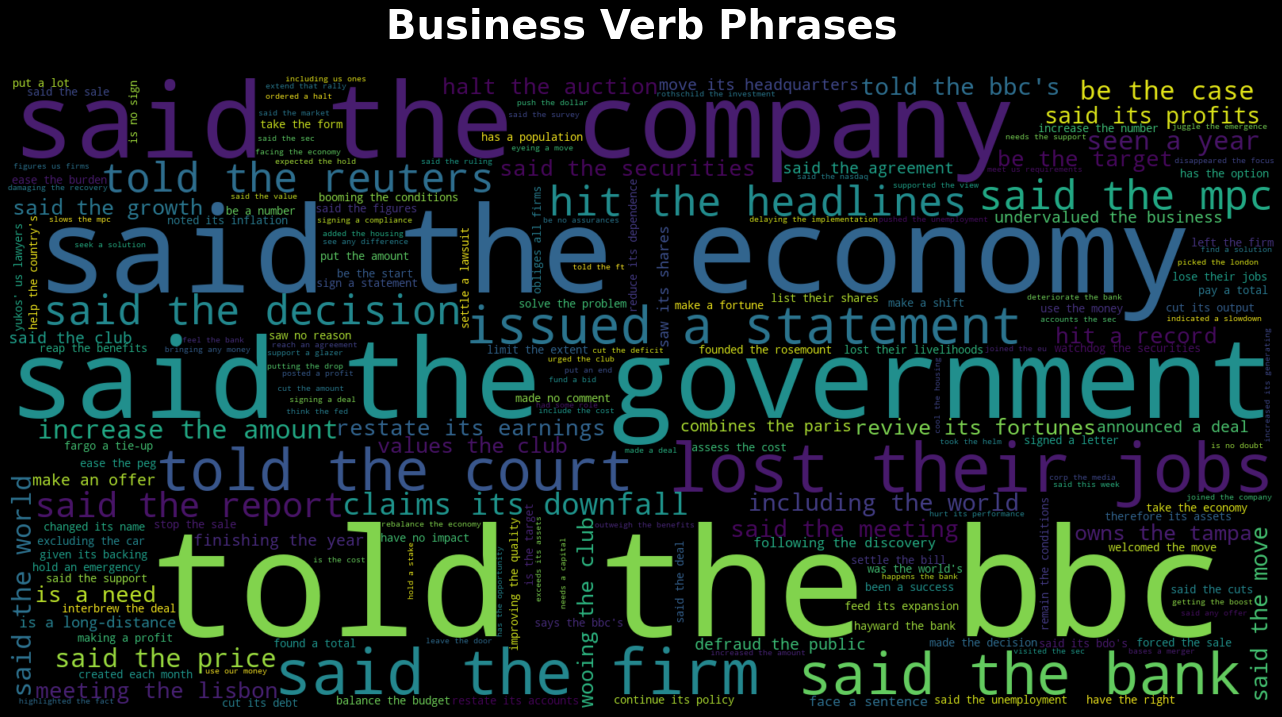

In [18]:
vp_figures['business']

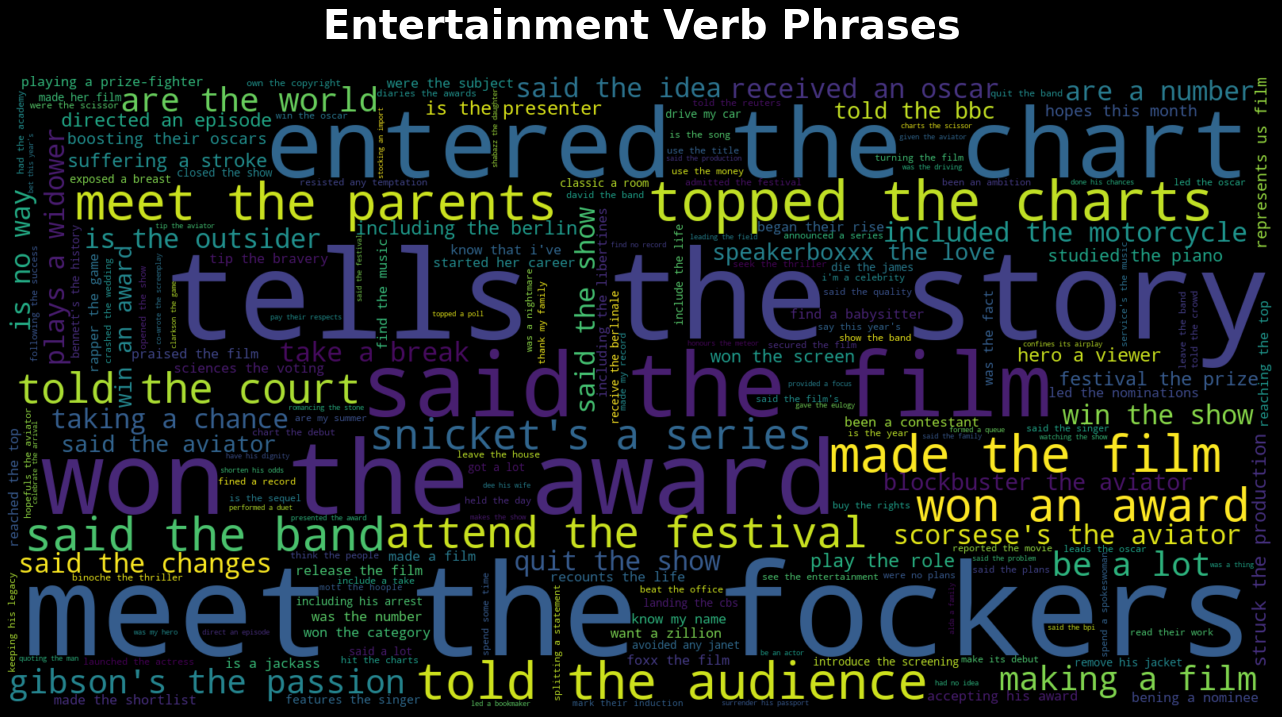

In [19]:
vp_figures['entertainment']

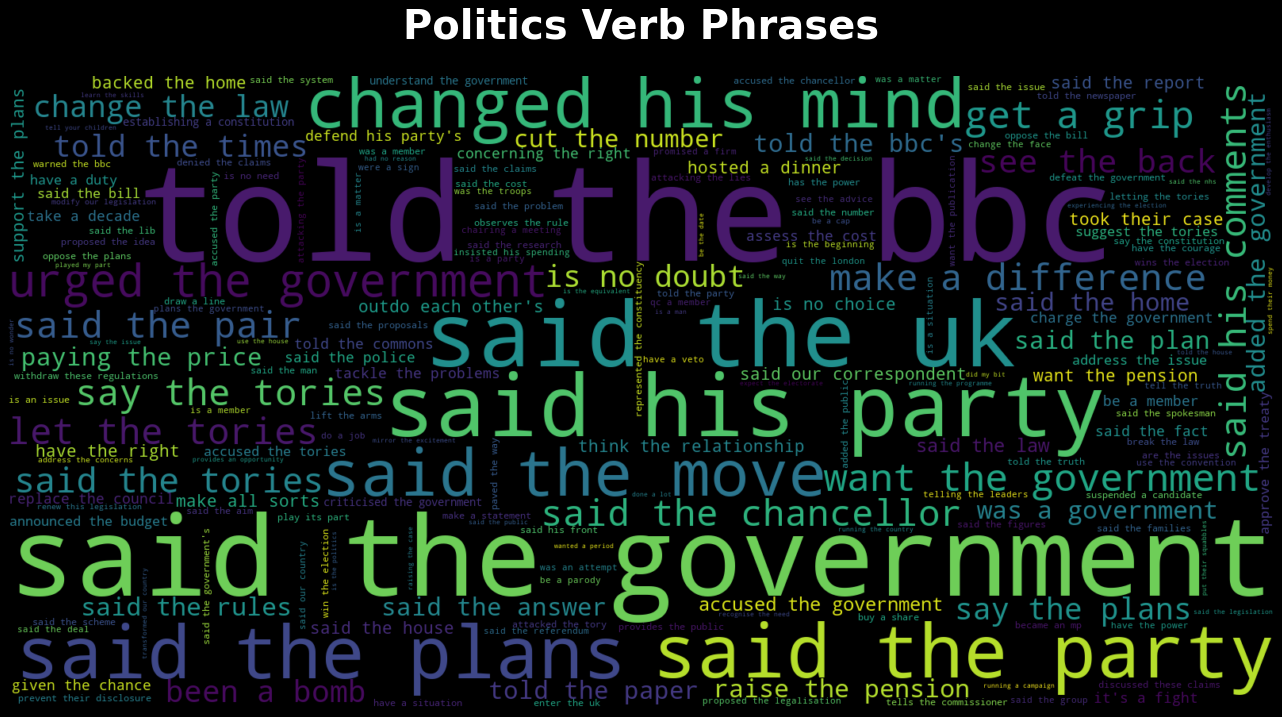

In [20]:
vp_figures['politics']

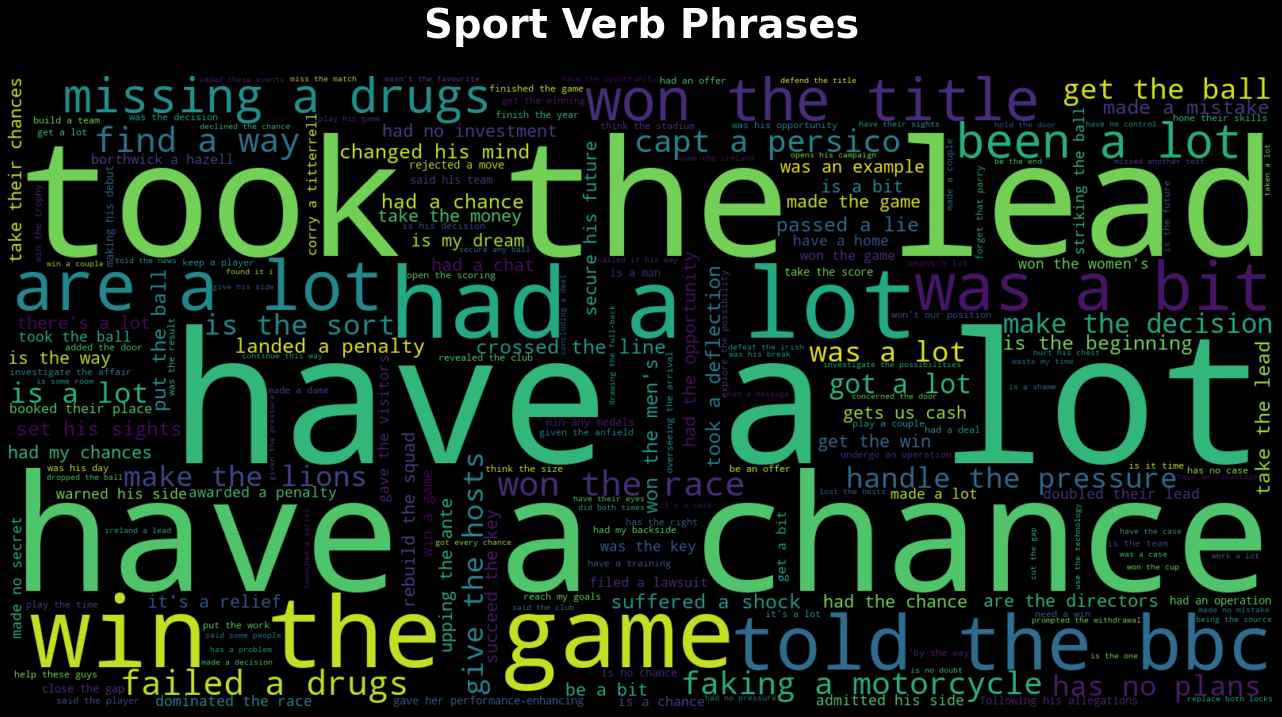

In [21]:
vp_figures['sport']

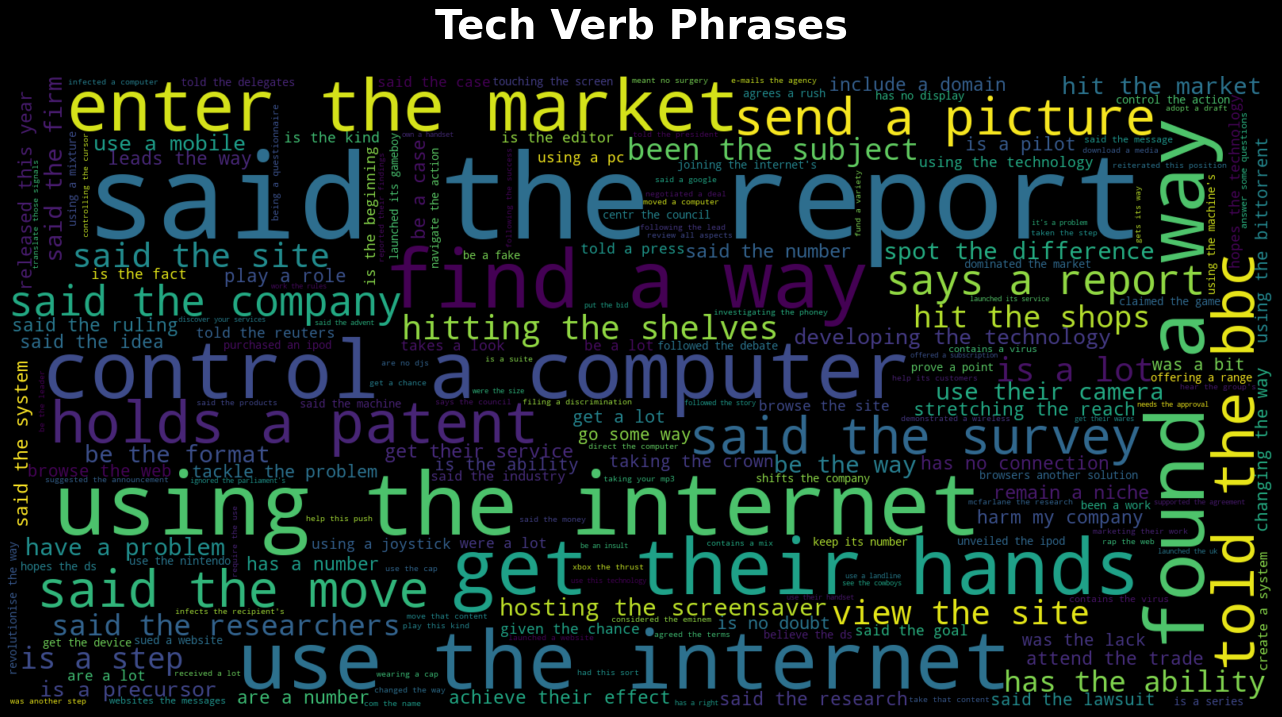

In [22]:
vp_figures['tech']

## Label Encoding the Target Column

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_labels'] = le.fit_transform(df.category)
le_classes = list(le.classes_)
df.head()

file_id       category  \
0  pol_313.txt       politics   
1  pol_158.txt       politics   
2  spo_305.txt          sport   
3  tec_094.txt           tech   
4  ent_106.txt  entertainment   

                                                text  text_length  \
0  Parties warned over 'grey vote'\n\nPolitical p...         2374   
1  Petrol duties frozen, Brown says\n\nChancellor...         1575   
2  Kirwan demands Italy consistency\n\nItaly coac...          939   
3  What high-definition will do to DVDs\n\nFirst ...         5103   
4  Streets have 'album of the year'\n\nThe Street...         1164   

                                              tokens  \
0  [parties, warned, over, 'grey, vote', politica...   
1  [petrol, duties, frozen, brown, says, chancell...   
2  [kirwan, demands, italy, consistency, italy, c...   
3  [what, high-definition, will, do, to, dvds, fi...   
4  [streets, have, 'album, of, the, year', the, s...   

                                          clean_text  \
0  parties warned over 'grey vote' political part...   
1  petrol duties frozen brown says chancellor gor...   
2  kirwan demands italy consistency italy coach j...   
3  what high-definition will do to dvds first it ...   
4  streets have 'album of the year' the streets a...   

                                        no_stopwords  \
0  parties warned 'grey vote' political parties c...   
1  petrol duties frozen brown says chancellor gor...   
2  kirwan demands italy consistency italy coach j...   
3  high-definition dvds first humble home video d...   
4  streets 'album year' streets aka british rappe...   

                                             stemmed  \
0  parti warn 'grey vote' polit parti cannot affo...   
1  petrol duti frozen brown say chancellor gordon...   
2  kirwan demand itali consist itali coach john k...   
3  high-definit dvd first humbl home video dvd ho...   
4  street 'album year' street aka british rapper ...   

                                            pos_tags  encoded_labels  
0  [(parties, NNS), (warned, VBD), (over, IN), ('...               2  
1  [(petrol, NN), (duties, NNS), (frozen, VBP), (...               2  
2  [(kirwan, NN), (demands, NNS), (italy, JJ), (c...               3  
3  [(what, WP), (high-definition, NN), (will, MD)...               4  
4  [(streets, NNS), (have, VBP), ('album, VBN), (...               1

## Splitting the Data into Training/Testing Set

In [46]:
from sklearn.model_selection import train_test_split
X = df.no_stopwords
y = df.encoded_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
print(f"Dataset Shape")
print(f"{'='*20}\nX_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}\n{'='*20}")

Dataset Shape
X_train: (1557,)
X_test: (668,)
y_train: (1557,)
y_test: (668,)


## Vectorizing the Text Using TF-IDF Vectorization

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=10, max_df=1., max_features=None, lowercase=False)
X_train_cv = tfidf.fit_transform(X_train).toarray()
X_test_cv = tfidf.transform(X_test).toarray()

# Building the Models

## Creating a Function to Print Model Accuracy

In [59]:
def accuracy_metrics(classifier, X_train, X_test, y_train, y_test, y_pred, cm_totals=False, class_labels=None):
    b1 = '='*60
    b2 = '-'*60
    from sklearn.metrics import classification_report, confusion_matrix
    print(f"{b1}\nAccuracy(Train): {classifier.score(X_train, y_train)}")
    print(f"Accuracy(Test): {classifier.score(X_test, y_test)}\n{b1}")
    print(f"{b1}\nClassification Report:\n{classification_report(y_test, y_pred)}\n{b1}")
    cm = confusion_matrix(y_test, y_pred)
    if class_labels == None:
        #cm_df = pd.DataFrame(cm, columns=['Predicted ' + str(i) for i in range(len(cm))], index=['Actual ' + str(i) for i in range(len(cm))])
        cm_df = pd.DataFrame(cm, columns=[['Predicted'] * len(cm), [str(i) for i in range(len(cm))]], index=[['Actual'] * len(cm), [str(i) for i in range(len(cm))]])
    else:
        cm_df = pd.DataFrame(cm, columns=[['Predicted'] * len(cm), class_labels], index=[['Actual'] * len(cm), class_labels])
        #cm_df = pd.DataFrame(cm, columns=['Predicted ' + name for name in class_labels], index=['Actual ' + class_labels[i] for i in range(len(class_labels))])
    if cm_totals == True:
        cm_df['Predicted','Total'] = np.sum(cm_df, axis=1)
        cm_df.loc[('Actual','Total'),:] = np.sum(cm_df, axis=0)
    cm_df = cm_df.astype('int')
    return cm_df

## • Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv, y_train)
rfc_pred = rfc.predict(X_test_cv)

In [61]:
cm = accuracy_metrics(rfc, X_train_cv, X_test_cv, y_train, y_test, rfc_pred, class_labels=le_classes)
cm

Accuracy(Train): 1.0
Accuracy(Test): 0.9625748502994012
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       152
           1       0.99      0.93      0.96       122
           2       0.96      0.96      0.96       119
           3       0.97      0.99      0.98       153
           4       0.96      0.95      0.95       122

    accuracy                           0.96       668
   macro avg       0.96      0.96      0.96       668
weighted avg       0.96      0.96      0.96       668



Predicted                                  
                      business entertainment politics sport tech
Actual business            147             0        3     0    2
       entertainment         3           114        2     2    1
       politics              2             0      114     1    2
       sport                 1             0        0   152    0
       tech                  3             1        0     2  116

## • Multinomial Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
mnb_pred = mnb.predict(X_test_cv)

In [63]:
accuracy_metrics(mnb, X_train_cv, X_test_cv, y_train, y_test, mnb_pred, class_labels=le_classes)

Accuracy(Train): 0.98330122029544
Accuracy(Test): 0.9790419161676647
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.99      0.97      0.98       122
           2       0.93      1.00      0.96       119
           3       0.99      0.99      0.99       153
           4       0.98      0.96      0.97       122

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



Predicted                                  
                      business entertainment politics sport tech
Actual business            148             0        3     0    1
       entertainment         0           118        3     0    1
       politics              0             0      119     0    0
       sport                 1             0        0   152    0
       tech                  0             1        3     1  117

## • Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
lr_pred = lr.predict(X_test_cv)

In [65]:
accuracy_metrics(lr, X_train_cv, X_test_cv, y_train, y_test, lr_pred, class_labels=le_classes)

Accuracy(Train): 0.9955041746949261
Accuracy(Test): 0.9790419161676647
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.99      0.98      0.98       122
           2       0.94      0.98      0.96       119
           3       1.00      0.99      1.00       153
           4       0.97      0.98      0.97       122

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



Predicted                                  
                      business entertainment politics sport tech
Actual business            147             0        4     0    1
       entertainment         0           119        2     0    1
       politics              0             0      117     0    2
       sport                 1             0        0   152    0
       tech                  0             1        2     0  119

### • Multinomial Naive Bayes has the highest accuracy score on the validation dataset out of all the models.